<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.797335,0.026351,75.823686,75.796269,0.027416
1,0.0,1.0,78.662942,-0.004713,88.658229,88.663643,-0.005414
2,0.0,2.0,85.668306,-0.044120,95.624186,95.669969,-0.045783
3,0.0,3.0,88.934779,-0.026198,98.908581,98.936890,-0.028309
4,0.0,4.0,70.794202,-0.033239,80.760963,80.793823,-0.032860
...,...,...,...,...,...,...,...
249995,999.0,245.0,46.022613,-0.158084,55.864529,56.024887,-0.160358
249996,999.0,246.0,20.387836,0.324742,30.712579,30.393901,0.318678
249997,999.0,247.0,94.993411,-0.001264,104.992147,104.988444,0.003703
249998,999.0,248.0,32.050444,0.016707,42.067150,42.054784,0.012366


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.797335,0.026351,75.823686,75.796269,0.027416
1,0.0,1.0,78.662942,-0.004713,88.658229,88.663643,-0.005414
2,0.0,2.0,85.668306,-0.044120,95.624186,95.669969,-0.045783
3,0.0,3.0,88.934779,-0.026198,98.908581,98.936890,-0.028309
4,0.0,4.0,70.794202,-0.033239,80.760963,80.793823,-0.032860
...,...,...,...,...,...,...,...
249995,999.0,245.0,46.022613,-0.158084,55.864529,56.024887,-0.160358
249996,999.0,246.0,20.387836,0.324742,30.712579,30.393901,0.318678
249997,999.0,247.0,94.993411,-0.001264,104.992147,104.988444,0.003703
249998,999.0,248.0,32.050444,0.016707,42.067150,42.054784,0.012366


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.797335  0.026351   75.823686   75.796269  0.027416
      1.0    78.662942 -0.004713   88.658229   88.663643 -0.005414
      2.0    85.668306 -0.044120   95.624186   95.669969 -0.045783
      3.0    88.934779 -0.026198   98.908581   98.936890 -0.028309
      4.0    70.794202 -0.033239   80.760963   80.793823 -0.032860
...                ...       ...         ...         ...       ...
999.0 245.0  46.022613 -0.158084   55.864529   56.024887 -0.160358
      246.0  20.387836  0.324742   30.712579   30.393901  0.318678
      247.0  94.993411 -0.001264  104.992147  104.988444  0.003703
      248.0  32.050444  0.016707   42.067150   42.054784  0.012366
      249.0  26.751180  0.196680   36.947860   36.756304  0.191556

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.797335  0.026351   75.823686   75.796269  0.027416
      1.0    78.662942 -0.004713   88.658229   88.663643 -0.005414
      2.0    85.668306 -0.044120   95.624186   95.669969 -0.045783
      3.0    88.934779 -0.026198   98.908581   98.936890 -0.028309
      4.0    70.794202 -0.033239   80.760963   80.793823 -0.032860
...                ...       ...         ...         ...       ...
999.0 245.0  46.022613 -0.158084   55.864529   56.024887 -0.160358
      246.0  20.387836  0.324742   30.712579   30.393901  0.318678
      247.0  94.993411 -0.001264  104.992147  104.988444  0.003703
      248.0  32.050444  0.016707   42.067150   42.054784  0.012366
      249.0  26.751180  0.196680   36.947860   36.756304  0.191556

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.797335,0.026351,75.823686,75.796269,0.027416
1,0.0,1.0,78.662942,-0.004713,88.658229,88.663643,-0.005414
2,0.0,2.0,85.668306,-0.044120,95.624186,95.669969,-0.045783
3,0.0,3.0,88.934779,-0.026198,98.908581,98.936890,-0.028309
4,0.0,4.0,70.794202,-0.033239,80.760963,80.793823,-0.032860
...,...,...,...,...,...,...,...
249995,999.0,245.0,46.022613,-0.158084,55.864529,56.024887,-0.160358
249996,999.0,246.0,20.387836,0.324742,30.712579,30.393901,0.318678
249997,999.0,247.0,94.993411,-0.001264,104.992147,104.988444,0.003703
249998,999.0,248.0,32.050444,0.016707,42.067150,42.054784,0.012366


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.797335  0.026351   75.823686   75.796269  0.027416
      1.0    78.662942 -0.004713   88.658229   88.663643 -0.005414
      2.0    85.668306 -0.044120   95.624186   95.669969 -0.045783
      3.0    88.934779 -0.026198   98.908581   98.936890 -0.028309
      4.0    70.794202 -0.033239   80.760963   80.793823 -0.032860
...                ...       ...         ...         ...       ...
999.0 245.0  46.022613 -0.158084   55.864529   56.024887 -0.160358
      246.0  20.387836  0.324742   30.712579   30.393901  0.318678
      247.0  94.993411 -0.001264  104.992147  104.988444  0.003703
      248.0  32.050444  0.016707   42.067150   42.054784  0.012366
      249.0  26.751180  0.196680   36.947860   36.756304  0.191556

[250000 rows x 5 columns]

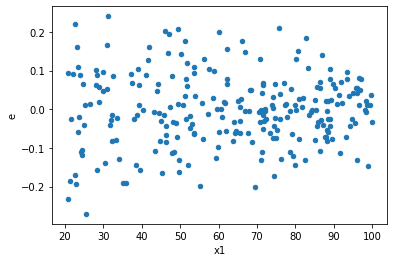

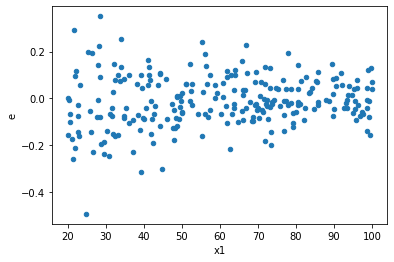

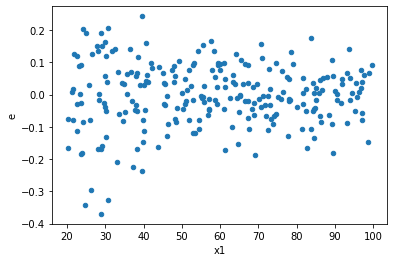

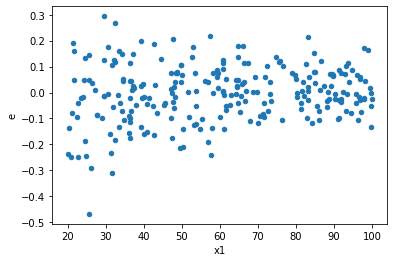

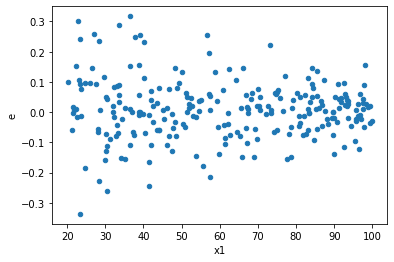

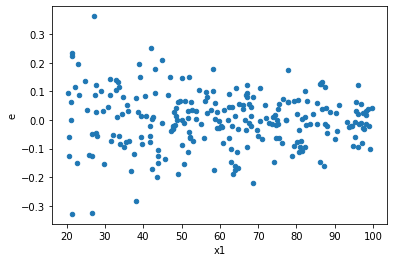

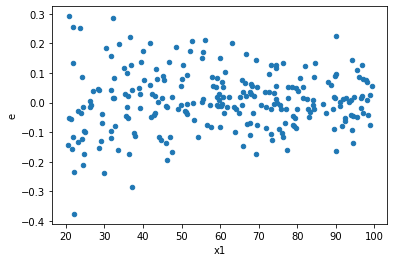

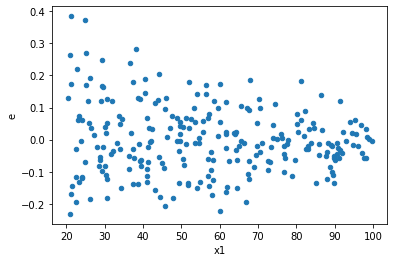

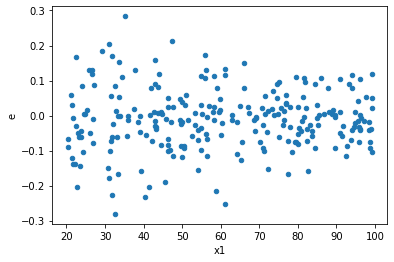

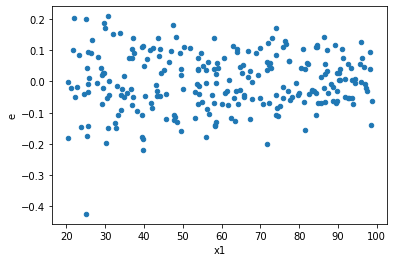

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,1.2518354156481795,0.5100776202030678,0.01264480217826444,0.005152299193970381,0.40746380380919167,1.1661139308870138e-05,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,1.8936237449180064,0.5592267570603662,0.019127512574929357,0.005648755121821881,0.29532094670928444,4.110435488199689e-09,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,1.5592344112236243,0.53274039161239,0.015749842537612368,0.0053812160768928275,0.34166792868194634,1.8971103219619007e-07,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,1.725759464082497,0.5869909408030529,0.01743191377861108,0.00592920142225306,0.3401348525213667,1.695014999182714e-07,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,1.4980879849004836,0.42128015207093783,0.015132201867681652,0.004255355071423614,0.2812118889658694,1.0466330730713114e-09,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,1.4974320375824086,0.5135099355055056,0.015125576137196046,0.005186969045510158,0.34292703950328396,2.0796417071245622e-07,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,1.5884395927022084,0.5778978183665009,0.016044844370729377,0.0058373517006717265,0.36381479095682673,8.803578205452923e-07,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,1.7409998877824095,0.5027559618732943,0.017585857452347572,0.005078343049225195,0.28877426437613235,2.2078712537552008e-09,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,1.0992332725431693,0.41926766348183403,0.011103366389324942,0.00423502690385691,0.3814182794083578,2.6629609375523085e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    991
Reject001=1 : Homoscedasticity        9
Name: Result_test, dtype: int64